<a href="https://colab.research.google.com/github/Hristo2076/ml_processes/blob/main/variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Цель:** изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

##**Описание задания:**
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

In [402]:
#import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

In [403]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [404]:
X = pd.DataFrame(data= data.data, columns=data.feature_names)    
X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [405]:
y = pd.DataFrame(data=data.target,columns=data.target_names)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [406]:
df = pd.concat([X,y],axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [408]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 test_size=0.25)

In [409]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [410]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(f'Ttrain RMSE: {mean_squared_error(y_train,y_pred_train,squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test,y_pred,squared=False)}')


Ttrain RMSE: 0.7214930466501481
Test RMSE: 0.7356145375446766


<Axes: >

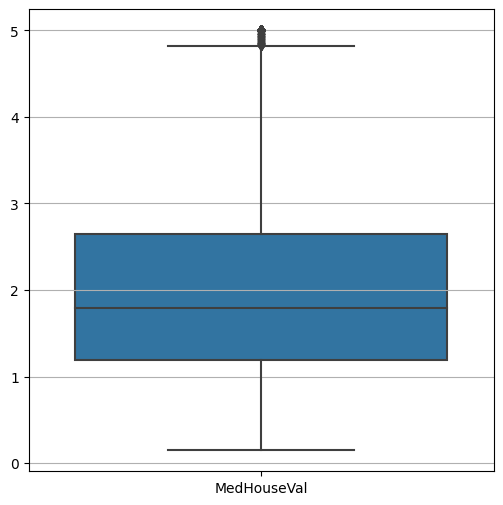

In [411]:
plt.figure(figsize=(6,6))
plt.grid()
sns.boxplot(y)


In [412]:
df[df.MedHouseVal > 4.8].count()

MedInc         1079
HouseAge       1079
AveRooms       1079
AveBedrms      1079
Population     1079
AveOccup       1079
Latitude       1079
Longitude      1079
MedHouseVal    1079
dtype: int64

Есть небольшой выброс, после отметки 4.8, думаю не стоит его удалять так как больше тысячи строк после этой отметки

6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
  1. Сделайте выводы.
  2. Удалите признаки на основании полученных значений, выводов.
  3. Повторите п. 3, п. 4 на измененных данных.
7. Исследуйте оставленные признаки на выбросы.
  1. Удалите выбросы в случае обнаружения.
  2. Повторите п. 3, п. 4 на измененных данных.
8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
  1. Повторите п. 3, п. 4 на измененных данных.

<Axes: >

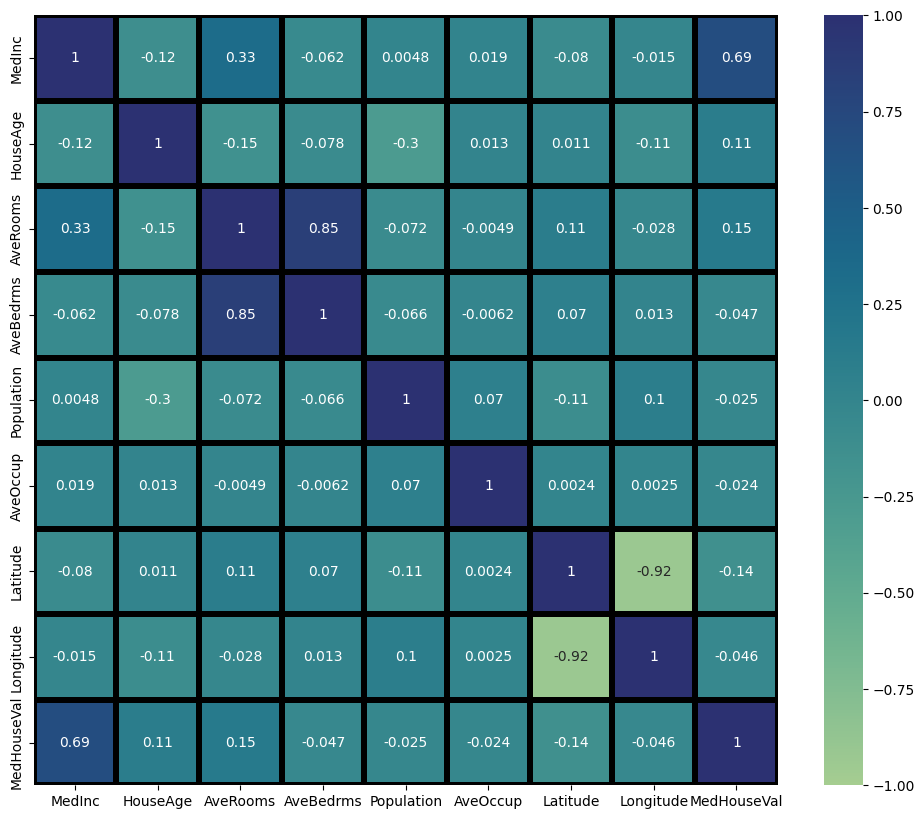

In [413]:

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot = True,
            vmin=-1, vmax=1,
            center=0,
            cmap='crest',
            linewidths=3,
            linecolor='black',
            ax=ax)

Довольно значимая корреляция между `AveBedrms` `AveRooms` можем оставить один из столбцов и посмотреть на то как измениться наш `RMSE`

In [414]:
df.drop('AveRooms',axis=1,inplace=True)
df.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [415]:
X1,y1 = df.drop('MedHouseVal',axis=1),df.MedHouseVal 

In [416]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,
                                                 random_state=42,
                                                 test_size = 0.25)

In [417]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

y_pred = model1.predict(X_test)
y_pred_train = model1.predict(X_train)

print(f'Ttrain RMSE: {mean_squared_error(y_train,y_pred_train,squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test,y_pred,squared=False)}')


Ttrain RMSE: 0.7292433765505779
Test RMSE: 0.7330847574343576


<Figure size 800x800 with 0 Axes>

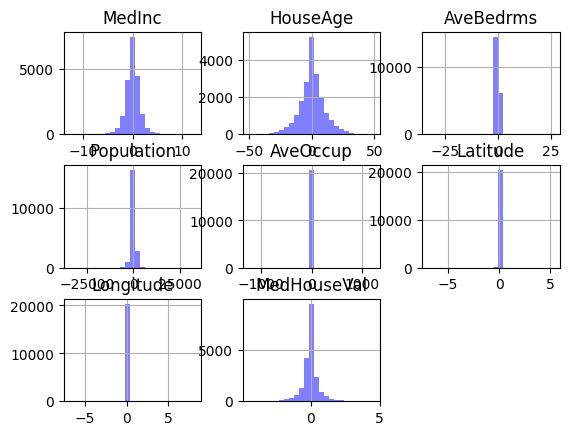

In [418]:
plt.figure(figsize=(8,8));

df.diff().hist(color="b", alpha=0.5, bins=25);

In [419]:
df.describe()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [420]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)

IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data_clean = df[~((df < lower) | (df > upper)).any(axis=1)]
data_clean.describe()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000,16365.000000
mean,3.658090,29.441002,1.047307,1271.213016,2.865328,35.668126,-119.624251,1.929675
std,1.450053,12.208909,0.066657,627.982690,0.625462,2.139993,1.994852,0.944759
min,0.536000,1.000000,0.866013,5.000000,1.161290,32.540000,-124.350000,0.149990
25%,2.557500,19.000000,1.002732,813.000000,2.436923,33.940000,-121.820000,1.186000
50%,3.491900,30.000000,1.043836,1159.000000,2.815725,34.290000,-118.600000,1.777000
75%,4.583300,38.000000,1.088757,1637.000000,3.246102,37.730000,-118.030000,2.500000
max,8.011300,52.000000,1.239521,3132.000000,4.560748,41.950000,-114.570000,4.822000


In [421]:
X2,y2 = data_clean.drop('MedHouseVal',axis=1),data_clean.MedHouseVal

X_train,X_test,y_train,y_test = train_test_split(X2,y2,
                                                 random_state=42,
                                                 test_size=0.25)

model2 = LinearRegression()
model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)
y_pred_train = model2.predict(X_train)

print(f'Ttrain RMSE: {mean_squared_error(y_train,y_pred_train,squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test,y_pred,squared=False)}')


Ttrain RMSE: 0.5760194663914526
Test RMSE: 0.5720653282320503


In [422]:
df.Population = np.sqrt(df.Population)
df.AveOccup = (df.AveOccup)**2
df.AveBedrms = np.log(df.AveBedrms)
df.MedHouseVal = (df.MedHouseVal)**2
df.MedInc = (df.MedInc)**2


In [423]:
df.head()


,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,69.308955,41.0,0.023530,17.944358,6.530864,37.88,-122.23,20.484676
1,68.913242,21.0,-0.028522,49.000000,4.451433,37.86,-122.22,12.852225
2,52.669855,52.0,0.070874,22.271057,7.852660,37.85,-122.24,12.397441
3,31.844578,52.0,0.070514,23.622024,6.492025,37.85,-122.25,11.648569
4,14.793254,52.0,0.077962,23.769729,4.758799,37.85,-122.25,11.710084


In [428]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

model3 =LinearRegression()


In [429]:
model3.fit(X_train,y_train)

y_pred = model3.predict(X_test)
y_pred_train = model3.predict(X_train)

print(f'Ttrain RMSE: {mean_squared_error(y_train,y_pred_train,squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test,y_pred,squared=False)}')

Ttrain RMSE: 0.5760194663914526
Test RMSE: 0.5720653282320503


9. Сформулируйте выводы по проделанной работе.
  1. Мною была проделана работа по разведочному анализу и преобразованию данных при попытки улучшить модель качество модели только ухудшалось, можно смело заявить что стоило работать не  с выбросами,а преобразовать с имеющимися данными  .


In [432]:
d = {'model': [0.735,0.721], 
     'model1': [0.733,0.729],
     'model2': [0.572,0.576],
     'model3': [0.572,0.576]}


In [433]:
pd.DataFrame(data=d,index=['test','train'])

,model,model1,model2,model3
test,0.735,0.733,0.572,0.572
train,0.721,0.729,0.576,0.576
